<center><img src="http://i.imgur.com/sSaOozN.png" width="500"></center>

## Course: Computational Thinking for Governance Analytics

### Prof. José Manuel Magallanes, PhD 
* Visiting Professor of Computational Policy at Evans School of Public Policy and Governance, and eScience Institute Senior Data Science Fellow, University of Washington.
* Professor of Government and Political Methodology, Pontificia Universidad Católica del Perú. 

_____

# Data Preprocessing in Python: Data Integration and Reshaping

By now, we  know how to collect data from different places, and clean/format them as needed. While the cleaning and formatting is done for each data source, we finally need to integrate all the sources into one to start the real analytical work. Let's get the data on [democracy index](https://en.wikipedia.org/wiki/Democracy_Index) by _The Economist_:

In [62]:
# importing pandas for the notebook
import pandas as pd

#link for the tables
demoLink="https://en.wikipedia.org/wiki/Democracy_Index"

# fetching the tables
demodata=pd.read_html(demoLink,header=0,flavor="bs4",attrs={'class':"wikitable sortable"})

You should remember by now that **demodata** is a _list_ of all the sortable tables from that URL. Let me recover the one we want:

In [63]:
demoVars=demodata[4].copy()

In this last session on Python, we want to prepare data on the world countries and their level of democracy. I will add some variables from other tables to this one later. Take a look at what you have now:

In [64]:
# first rows
demoVars.head()

Rank  \
0  Full democracies   
1                 1   
2                 2   
3                 3   
4                 4   

  .mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Δ Rank  \
0                                   Full democracies                              
1                                                NaN                              
2                                                NaN                              
3                                                NaN                              
4                                                NaN                              

            Country       Regime type     Overall score           Δ Score  \
0  Full democracies  Full democracies  Full democracies  Full democracies   
1            Norway    Full democracy              9.81              0.06   
2           Iceland    Full democracy              9.37              0.21   
3            Sweden    Full democracy              9.26              0.13   
4       New Zealand    Full democracy              9.25              0.01   

  Elec­toral pro­cess and plura­lism Func­tioning of govern­ment  \
0                   Full democracies            Full democracies   
1                              10.00                        9.64   
2                              10.00                        8.57   
3                               9.58                        9.29   
4                              10.00                        8.93   

  Poli­tical partici­pation Poli­tical cul­ture  Civil liber­ties  
0          Full democracies    Full democracies  Full democracies  
1                     10.00               10.00              9.41  
2                      8.89               10.00              9.41  
3                      8.33               10.00              9.12  
4                      8.89                8.75              9.71

Let's start by getting rid of the columns we will not use:

In [65]:
#column positions to drop
whichToDrop=[0,1,5]

#dropping and updating the data frame
demoVars.drop(labels=demoVars.columns[whichToDrop],axis=1,inplace=True)

Let's take a look at the columns names:

In [66]:
# these are:
demoVars.columns
#demoVars.drop(labels=demoVars.columns[0],axis=1, inplace=True)
#demoVars.drop(labels=demoVars.columns[0],axis=1, inplace=True)
#demoVars.drop(labels=demoVars.columns[3],axis=1, inplace=True)

Index(['Country', 'Regime type', 'Overall score',
       'Elec­toral pro­cess and plura­lism', 'Func­tioning of govern­ment',
       'Poli­tical partici­pation', 'Poli­tical cul­ture', 'Civil liber­ties'],
      dtype='object')

The previous result shows nothing relevant, but the pandas data frame shows _unneeded dashes_ in the column names. Let's **check the presence of special characters**:

In [67]:
# this is a column name with dashes:
import re
re.sub("\s","",demoVars.columns[5])

'Poli\xadticalpartici\xadpation'

The result shows you some **hidden characters**. Let's use that info with the pandas replace:

In [68]:
# using pandas own replace function
demoVars.columns=demoVars.columns.str.replace("\s|\xad","",regex=True)

# current colum names
demoVars.columns

Index(['Country', 'Regimetype', 'Overallscore', 'Electoralprocessandpluralism',
       'Functioningofgovernment', 'Politicalparticipation', 'Politicalculture',
       'Civilliberties'],
      dtype='object')

Let's clean the data contents. Notice that in the website some labels that are not needed are present in this case. Let's check the frequency table of "Regime Type" to try to identify the wrong labels that are affecting the data frame to delete those *rows*: 

In [69]:
# frequency table using "value_counts"
demoVars['Regimetype'].value_counts()

Authoritarian            57
Flawed democracy         52
Hybrid regime            35
Full democracy           23
Full democracies          1
Flawed democracies        1
Hybrid regimes            1
Authoritarian regimes     1
Name: Regimetype, dtype: int64

In [70]:
# these are the wrong ones:
demoVars['Regimetype'].value_counts().index[4:]

Index(['Full democracies', 'Flawed democracies', 'Hybrid regimes',
       'Authoritarian regimes'],
      dtype='object')

In [71]:
#saving the wrong ones:
byeValues=demoVars['Regimetype'].value_counts().index[4:]

Now that we know which ones are not needed, we can **filter** the data frame **rows** using pandas' **isnin**:

In [72]:
# use "~" to request the "opposite" rows
demoVars = demoVars[~demoVars['Regimetype'].isin(byeValues)]

# data frame after
demoVars

Country      Regimetype Overallscore  \
1                              Norway  Full democracy         9.81   
2                             Iceland  Full democracy         9.37   
3                              Sweden  Full democracy         9.26   
4                         New Zealand  Full democracy         9.25   
5                              Canada  Full democracy         9.24   
..                                ...             ...          ...   
166                              Chad   Authoritarian         1.55   
167                             Syria   Authoritarian         1.43   
168          Central African Republic   Authoritarian         1.32   
169  Democratic Republic of the Congo   Authoritarian         1.13   
170                       North Korea   Authoritarian         1.08   

    Electoralprocessandpluralism Functioningofgovernment  \
1                          10.00                    9.64   
2                          10.00                    8.57   
3                           9.58                    9.29   
4                          10.00                    8.93   
5                           9.58                    8.93   
..                           ...                     ...   
166                         0.00                    0.00   
167                         0.00                    0.00   
168                         1.25                    0.00   
169                         0.00                    0.00   
170                         0.00                    2.50   

    Politicalparticipation Politicalculture Civilliberties  
1                    10.00            10.00           9.41  
2                     8.89            10.00           9.41  
3                     8.33            10.00           9.12  
4                     8.89             8.75           9.71  
5                     8.89             9.38           9.41  
..                     ...              ...            ...  
166                   1.67             3.75           2.35  
167                   2.78             4.38           0.00  
168                   1.11             1.88           2.35  
169                   1.67             3.13           0.88  
170                   1.67             1.25           0.00  

[167 rows x 8 columns]

Notice that the index **0** has dissapeared, and that even though you have 167 countries now, the last one has index **170**. When you filter rows that will happen; so it is better to **reset the indexes of the data frame**:

In [73]:
# new indexes will appear
demoVars.reset_index(drop=True,inplace=True)

Let's save the file as in CSV format:

In [74]:
demoVars.to_csv("demoVars.csv",index=False)

## Exercise 1:

- Go to this link: [https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes).
- Scrap the table of countries, and keep country names, **ISO codes** and **Internet codes**.
- Prepare a CSV file with the clean and formatted data, and upload that file into GitHub.
- Read the file from Github and add the ISO codes and internet codes to the table of democracy index.

# Integrating Data Frames

Integrating data sets needs the following considerations:

* Merging is done on two data frames.
* You need a column in each data frame with that share the same exact and unique values. The column names or titles need not be the same.
* The merged table shows by default the mutual coincidences; but you can also request the values not matched, which will help you detect possible extra cleaning.
* Pandas differentiates the **left** from the **right** data frames.

Let me bring the new data frame with ISO codes and internet codes:

In [107]:
# link to the data in CSV format
linkDataIso='https://github.com/EvansDataScience/CTforGA_integrating/raw/main/isodata.csv'

# using 'read_csv' with a link
DataIso=pd.read_csv(linkDataIso)

In [108]:
#Check the current names:
DataIso.columns

Index(['Countryname', 'Officialstatename', 'InternetccTLD', 'iso2', 'iso3'], dtype='object')

* **Option one**(default): merge only the coincidences:

In [109]:
# notice the key column are country names, but the column names are different:
allData=demoVars.merge(DataIso,left_on="Country",right_on="Countryname") 

Once the merged has taken place, check the differences:

In [110]:
# number of rows (countries) before merge
demoVars.shape

(167, 8)

In [111]:
# number of rows after merge
allData.shape

(138, 13)

The previous merge has **lost several rows** (countries).

* **Option two**: you want to keep all the rows, matched and unmatched, from **both** data frames:

In [112]:
# merge 'outer' keeps all matched and unmatched
# merge 'indicator' will tell you if the key was found in 'both' or only in one of them
allData=demoVars.merge(DataIso,left_on="Country",right_on="Countryname",how='outer',indicator='True')

The _allData_ dataframe has now a  column named 'True', the **indicator**:

In [113]:
allData.columns

Index(['Country', 'Regimetype', 'Overallscore', 'Electoralprocessandpluralism',
       'Functioningofgovernment', 'Politicalparticipation', 'Politicalculture',
       'Civilliberties', 'Countryname', 'Officialstatename', 'InternetccTLD',
       'iso2', 'iso3', 'True'],
      dtype='object')

In [114]:
# explore matched and unmatched counts:
allData['True'].value_counts()

both          138
right_only    111
left_only      29
Name: True, dtype: int64

Our main task is to add columns to the Democracy Index data. So these are the countries from The Economist that did not find a match:

In [115]:
allData[allData['True']=='left_only'].Country

9                           Netherlands
10                               Taiwan
15                       United Kingdom
22                          South Korea
24                        United States
30                       Czech Republic
31                           Cape Verde
54                          Philippines
62                   Dominican Republic
79                              Moldova
92                             Tanzania
93                              Bolivia
102                              Gambia
108                         Ivory Coast
112                           Palestine
123                              Russia
124                               Niger
128               Republic of the Congo
131                             Comoros
136                             Vietnam
142                           Venezuela
144                United Arab Emirates
148                               Sudan
151                                Iran
160                                Laos


Those names should be here, but written differently:

In [116]:
allData[allData['True']=='right_only'].Countryname

167               Åland Islands
168              American Samoa
169                     Andorra
170                    Anguilla
171                  Antarctica
                 ...           
273                    Viet Nam
274    Virgin Islands (British)
275       Virgin Islands (U.S.)
276           Wallis and Futuna
277              Western Sahara
Name: Countryname, Length: 111, dtype: object

The next steps might seem a little laborious, combining computational thinking adn finally some brute force. The first tool we need is another library allows fuzzy merging: [TheFuzz](https://github.com/seatgeek/thefuzz).

The library has two functions of interest:_extractOne_ and _extract_. Let me show you how they work:

In [117]:
# The countries unmatched
UnmatchedLeft=allData[allData['True']=='left_only'].Country.to_list()
UnmatchedRight=allData[allData['True']=='right_only'].Countryname.to_list()

This is a country name fro the economist that did not get a match in the ISO data:

In [118]:
UnmatchedLeft[0]

'Netherlands'

Let's find the best match from the ISO data:

In [119]:
from thefuzz import process
process.extractOne(UnmatchedLeft[0], UnmatchedRight)

('Netherlands (the)', 95)

In [86]:
!pip install thefuzz

Let's find the three best matches from the ISO data:

In [87]:
import thefuzz

In [120]:
process.extract(UnmatchedLeft[0], UnmatchedRight,limit=3)

[('Netherlands (the)', 95),
 ('Saint Helena\xa0Ascension Island\xa0Tristan da Cunha', 58),
 ('Åland Islands', 52)]

These operations will not be done blindly. We will need to see what matches are done:

In [121]:
UnmatchedLeft=allData[allData['True']=='left_only'].Country.to_list()
UnmatchedLeft

['Netherlands',
 'Taiwan',
 'United Kingdom',
 'South Korea',
 'United States',
 'Czech Republic',
 'Cape Verde',
 'Philippines',
 'Dominican Republic',
 'Moldova',
 'Tanzania',
 'Bolivia',
 'Gambia',
 'Ivory Coast',
 'Palestine',
 'Russia',
 'Niger',
 'Republic of the Congo',
 'Comoros',
 'Vietnam',
 'Venezuela',
 'United Arab Emirates',
 'Sudan',
 'Iran',
 'Laos',
 'Syria',
 'Central African Republic',
 'Democratic Republic of the Congo',
 'North Korea']

In [123]:
[(left, process.extractOne(left, UnmatchedRight)) for left in sorted(UnmatchedLeft)]

[('Bolivia', ('Bolivia (Plurinational State of)', 90)),
 ('Cape Verde', ('Cabo Verde', 80)),
 ('Central African Republic', ('Central African Republic (the)', 95)),
 ('Comoros', ('Comoros (the)', 90)),
 ('Czech Republic', ('Central African Republic (the)', 86)),
 ('Democratic Republic of the Congo',
  ('Congo (the Democratic Republic of the)', 95)),
 ('Dominican Republic', ('Dominican Republic (the)', 95)),
 ('Gambia', ('Gambia (the)', 90)),
 ('Iran', ('Iran (Islamic Republic of)', 90)),
 ('Ivory Coast', ("Côte d'Ivoire", 58)),
 ('Laos', ('Barbados', 68)),
 ('Moldova', ('Moldova (the Republic of)', 90)),
 ('Netherlands', ('Netherlands (the)', 95)),
 ('Niger', ('Niger (the)', 90)),
 ('North Korea', ("Korea (the Democratic People's Republic of)", 86)),
 ('Palestine', ('Palestine, State of', 90)),
 ('Philippines', ('Philippines (the)', 95)),
 ('Republic of the Congo', ('Bahamas (the)', 86)),
 ('Russia', ('Russian Federation (the)', 90)),
 ('South Korea', ("Korea (the Democratic People's Re

These are the totally wrong matches:

In [124]:
# this is a list of tuples:
TotallyWrong=[('Czech Republic', ('Central African Republic (the)', 86)),
              ('Laos', ('Barbados', 68)),
              ('Republic of the Congo', ('Bahamas (the)', 86)),
              ('South Korea', ("Korea (the Democratic People's Republic of)", 86)),
              ('Sudan', ('South Sudan', 90)),
              ('United States', ('United States Minor Outlying Islands (the)', 90))]

Let me make a list with all the names in the democracy index countries that must be omitted currently:

In [125]:
omitLeft=[leftName for (leftName,rightFuzzy) in TotallyWrong] #parenthesis not needed
omitLeft

['Czech Republic',
 'Laos',
 'Republic of the Congo',
 'South Korea',
 'Sudan',
 'United States']

Create a dictionary with the changes that will be done:

In [126]:
# process.extractOne(left, UnmatchedRight)[0] IS JUST THE COUNTRY NAME TO THE RIGHT
# [0] just took first element in tuple.

# left for left in UnmatchedLeft IS JUST EVERY COUNTRY NAME TO THE LEFT

# if left not in omitLeft IS A CONDITION

{process.extractOne(left, UnmatchedRight)[0]:left for left in UnmatchedLeft if left not in omitLeft}

{'Netherlands (the)': 'Netherlands',
 'Taiwan (Province of China)': 'Taiwan',
 'United Kingdom of Great Britain and Northern Ireland (the)': 'United Kingdom',
 'Cabo Verde': 'Cape Verde',
 'Philippines (the)': 'Philippines',
 'Dominican Republic (the)': 'Dominican Republic',
 'Moldova (the Republic of)': 'Moldova',
 'Tanzania, the United Republic of': 'Tanzania',
 'Bolivia (Plurinational State of)': 'Bolivia',
 'Gambia (the)': 'Gambia',
 "Côte d'Ivoire": 'Ivory Coast',
 'Palestine, State of': 'Palestine',
 'Russian Federation (the)': 'Russia',
 'Niger (the)': 'Niger',
 'Comoros (the)': 'Comoros',
 'Viet Nam': 'Vietnam',
 'Venezuela (Bolivarian Republic of)': 'Venezuela',
 'United Arab Emirates (the)': 'United Arab Emirates',
 'Iran (Islamic Republic of)': 'Iran',
 'Syrian Arab Republic (the)': 'Syria',
 'Central African Republic (the)': 'Central African Republic',
 'Congo (the Democratic Republic of the)': 'Democratic Republic of the Congo',
 "Korea (the Democratic People's Republic of

Let's save the dict above and use it to replace:

In [127]:
changesRight={process.extractOne(left, UnmatchedRight)[0]:left for left in UnmatchedLeft if left not in omitLeft}
DataIso.Countryname.replace(changesRight,inplace=True)

DataIso has new country names. Let's prepare manually the remaining changes:

In [128]:
DataIso.Countryname.to_list()

['Afghanistan',
 'Åland Islands',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas (the)',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire\xa0Sint Eustatius\xa0Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'British Indian Ocean Territory (the)',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cape Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands (the)',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Cocos (Keeling) Islands (the)',
 'Colombia',
 'Comoros',
 'Democratic Republic of the Congo',
 'Congo (the)',
 'Cook Islands (the)',
 'Costa Rica',
 'Ivory Coast',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dom

In [129]:
# dict of manual changes
bruteForceChanges={'Korea (the Republic of)':'South Korea', 
                'United States of America (the)':'United States',
                'Czechia':'Czech Republic', 
                'Congo (the)':'Republic of the Congo',
                'Sudan (the)':'Sudan',
                "Lao People's Democratic Republic (the)":'Laos'}

# replacing
DataIso.Countryname.replace(bruteForceChanges,inplace=True)

Let's redo the merging with full coincidences (option 1):

In [130]:
# redoing merge
allData=demoVars.merge(DataIso,left_on="Country",right_on="Countryname")

# current dimension
allData.shape

(167, 13)

Here, we could drop the columns that are not needed:

In [131]:
allData.drop(["Countryname"],axis=1,inplace=True)
allData

Country      Regimetype Overallscore  \
0                              Norway  Full democracy         9.81   
1                             Iceland  Full democracy         9.37   
2                              Sweden  Full democracy         9.26   
3                         New Zealand  Full democracy         9.25   
4                              Canada  Full democracy         9.24   
..                                ...             ...          ...   
162                              Chad   Authoritarian         1.55   
163                             Syria   Authoritarian         1.43   
164          Central African Republic   Authoritarian         1.32   
165  Democratic Republic of the Congo   Authoritarian         1.13   
166                       North Korea   Authoritarian         1.08   

    Electoralprocessandpluralism Functioningofgovernment  \
0                          10.00                    9.64   
1                          10.00                    8.57   
2                           9.58                    9.29   
3                          10.00                    8.93   
4                           9.58                    8.93   
..                           ...                     ...   
162                         0.00                    0.00   
163                         0.00                    0.00   
164                         1.25                    0.00   
165                         0.00                    0.00   
166                         0.00                    2.50   

    Politicalparticipation Politicalculture Civilliberties  \
0                    10.00            10.00           9.41   
1                     8.89            10.00           9.41   
2                     8.33            10.00           9.12   
3                     8.89             8.75           9.71   
4                     8.89             9.38           9.41   
..                     ...              ...            ...   
162                   1.67             3.75           2.35   
163                   2.78             4.38           0.00   
164                   1.11             1.88           2.35   
165                   1.67             3.13           0.88   
166                   1.67             1.25           0.00   

                             Officialstatename InternetccTLD iso2 iso3  
0                        The Kingdom of Norway           .no   NO  NOR  
1                                      Iceland           .is   IS  ISL  
2                        The Kingdom of Sweden           .se   SE  SWE  
3                                  New Zealand           .nz   NZ  NZL  
4                                       Canada           .ca   CA  CAN  
..                                         ...           ...  ...  ...  
162                       The Republic of Chad           .td   TD  TCD  
163                   The Syrian Arab Republic           .sy   SY  SYR  
164               The Central African Republic           .cf   CF  CAF  
165       The Democratic Republic of the Congo           .cd   CD  COD  
166  The Democratic People's Republic of Korea           .kp   KP  PRK  

[167 rows x 12 columns]

Let's save this merged data frame in CSV format:

In [132]:
allData.to_csv('allData.csv',index=False)

## Exercise 2:

- Go to this link: [https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population](https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population).
- Scrap the table of countries, and keep country names, and region.
- Make sure the country names match exactly the ones from the table of democracy index.
- Merge this table with the allData data frame (just add the region)
- Prepare a CSV file with the clean, formatted and merged data, and upload that file into GitHub.

In [163]:
#link for the tables
ex2Link="https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"

# fetching the tables
ex2data=pd.read_html(ex2Link,header=0,flavor="bs4",attrs={'class':"wikitable sortable"})

In [164]:
ex2vars = ex2data[0].copy()

In [145]:
ex2vars.head()

Rank Country / Dependency    Region  Population % of world         Date  \
0    –                  NaN     World  7924417000        NaN  20 Jan 2022   
1    1                China      Asia  1412600000      17.8%  31 Dec 2021   
2    2                India      Asia  1387027430      17.5%  20 Jan 2022   
3    3        United States  Americas   333084475      4.20%  20 Jan 2022   
4    4         Indonesia[b]      Asia   271350000      3.42%  31 Dec 2020   

  Source (official or from the United Nations)  \
0                             UN projection[1]   
1                  National annual estimate[2]   
2                 National population clock[3]   
3                 National population clock[4]   
4                  National annual estimate[5]   

                                               Notes  
0                                                NaN  
1  The population figure refers to mainland China...  
2  The figure includes the population of India-ad...  
3  Includes the 50 states and the District of Col...  
4                                                NaN

In [165]:
#column positions to drop
ex2WhichToDrop = [0,3,4,5,6,7]

#Dropping unnecessary columns and updating df
ex2vars.drop(labels=ex2vars.columns[ex2WhichToDrop], axis=1, inplace=True)

In [166]:
ex2vars.columns

Index(['Country / Dependency', 'Region'], dtype='object')

In [169]:
#Cleaning Column Names
import re
#re.sub("\s", "", ex2vars.columns[0])

ex2vars.columns=ex2vars.columns.str.replace("\s|/","",regex=True)
ex2vars.columns

Index(['CountryDependency', 'Region'], dtype='object')

In [179]:
#cleaning data contents
ex2vars['Region'].value_counts()

#should we drop world?
removeVals= ex2vars['Region'].value_counts().index[5]
removeVals

removeValsList=[removeVals]
removeValsList

['World']

In [180]:
# use "~" to request the "opposite" rows
ex2vars = ex2vars[~ex2vars['Region'].isin(removeValsList)]

# data frame after
ex2vars

CountryDependency    Region
1                                  China      Asia
2                                  India      Asia
3                          United States  Americas
4                           Indonesia[b]      Asia
5                               Pakistan      Asia
..                                   ...       ...
237                   Niue (New Zealand)   Oceania
238                Tokelau (New Zealand)   Oceania
239                         Vatican City    Europe
240  Cocos (Keeling) Islands (Australia)   Oceania
241    Pitcairn Islands (United Kingdom)   Oceania

[241 rows x 2 columns]

In [187]:
ex2vars.reset_index(drop=True,inplace=True)

ex2vars.shape

(241, 2)

In [188]:
ex2vars.to_csv("ex2vars.csv", index=False)

Now to Merge with AllData Frame

Country      Regimetype Overallscore  \
0                              Norway  Full democracy         9.81   
1                             Iceland  Full democracy         9.37   
2                              Sweden  Full democracy         9.26   
3                         New Zealand  Full democracy         9.25   
4                              Canada  Full democracy         9.24   
..                                ...             ...          ...   
162                              Chad   Authoritarian         1.55   
163                             Syria   Authoritarian         1.43   
164          Central African Republic   Authoritarian         1.32   
165  Democratic Republic of the Congo   Authoritarian         1.13   
166                       North Korea   Authoritarian         1.08   

    Electoralprocessandpluralism Functioningofgovernment  \
0                          10.00                    9.64   
1                          10.00                    8.57   
2                           9.58                    9.29   
3                          10.00                    8.93   
4                           9.58                    8.93   
..                           ...                     ...   
162                         0.00                    0.00   
163                         0.00                    0.00   
164                         1.25                    0.00   
165                         0.00                    0.00   
166                         0.00                    2.50   

    Politicalparticipation Politicalculture Civilliberties  \
0                    10.00            10.00           9.41   
1                     8.89            10.00           9.41   
2                     8.33            10.00           9.12   
3                     8.89             8.75           9.71   
4                     8.89             9.38           9.41   
..                     ...              ...            ...   
162                   1.67             3.75           2.35   
163                   2.78             4.38           0.00   
164                   1.11             1.88           2.35   
165                   1.67             3.13           0.88   
166                   1.67             1.25           0.00   

                             Officialstatename InternetccTLD iso2 iso3  
0                        The Kingdom of Norway           .no   NO  NOR  
1                                      Iceland           .is   IS  ISL  
2                        The Kingdom of Sweden           .se   SE  SWE  
3                                  New Zealand           .nz   NZ  NZL  
4                                       Canada           .ca   CA  CAN  
..                                         ...           ...  ...  ...  
162                       The Republic of Chad           .td   TD  TCD  
163                   The Syrian Arab Republic           .sy   SY  SYR  
164               The Central African Republic           .cf   CF  CAF  
165       The Democratic Republic of the Congo           .cd   CD  COD  
166  The Democratic People's Republic of Korea           .kp   KP  PRK  

[167 rows x 12 columns]

# RESHAPING

### Wide and Long format

Let's open **allDataFull**, whose structure has the **WIDE** format. In this format, the variables are in every column, the most traditional one for spreadsheet users. 

In [38]:
allDataFull=pd.read_csv('https://github.com/EvansDataScience/CTforGA_integrating/raw/main/allDataFull.csv')
allDataFull

Country      Regimetype  Overallscore  \
0                              Norway  Full democracy          9.81   
1                             Iceland  Full democracy          9.37   
2                              Sweden  Full democracy          9.26   
3                         New Zealand  Full democracy          9.25   
4                              Canada  Full democracy          9.24   
..                                ...             ...           ...   
162                              Chad   Authoritarian          1.55   
163                             Syria   Authoritarian          1.43   
164          Central African Republic   Authoritarian          1.32   
165  Democratic Republic of the Congo   Authoritarian          1.13   
166                       North Korea   Authoritarian          1.08   

     Electoralprocessandpluralism  Functioningofgovernment  \
0                           10.00                     9.64   
1                           10.00                     8.57   
2                            9.58                     9.29   
3                           10.00                     8.93   
4                            9.58                     8.93   
..                            ...                      ...   
162                          0.00                     0.00   
163                          0.00                     0.00   
164                          1.25                     0.00   
165                          0.00                     0.00   
166                          0.00                     2.50   

     Politicalparticipation  Politicalculture  Civilliberties InternetccTLD  \
0                     10.00             10.00            9.41           .no   
1                      8.89             10.00            9.41           .is   
2                      8.33             10.00            9.12           .se   
3                      8.89              8.75            9.71           .nz   
4                      8.89              9.38            9.41           .ca   
..                      ...               ...             ...           ...   
162                    1.67              3.75            2.35           .td   
163                    2.78              4.38            0.00           .sy   
164                    1.11              1.88            2.35           .cf   
165                    1.67              3.13            0.88           .cd   
166                    1.67              1.25            0.00           .kp   

    iso2 iso3    Region  
0     NO  NOR    Europe  
1     IS  ISL    Europe  
2     SE  SWE    Europe  
3     NZ  NZL   Oceania  
4     CA  CAN  Americas  
..   ...  ...       ...  
162   TD  TCD    Africa  
163   SY  SYR      Asia  
164   CF  CAF    Africa  
165   CD  COD    Africa  
166   KP  PRK      Asia  

[167 rows x 12 columns]

This is the final dataframe, let's check the data types, in case they need formatting:

In [39]:
allDataFull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       167 non-null    object 
 1   Regimetype                    167 non-null    object 
 2   Overallscore                  167 non-null    float64
 3   Electoralprocessandpluralism  167 non-null    float64
 4   Functioningofgovernment       167 non-null    float64
 5   Politicalparticipation        167 non-null    float64
 6   Politicalculture              167 non-null    float64
 7   Civilliberties                167 non-null    float64
 8   InternetccTLD                 167 non-null    object 
 9   iso2                          166 non-null    object 
 10  iso3                          167 non-null    object 
 11  Region                        167 non-null    object 
dtypes: float64(6), object(6)
memory usage: 15.8+ KB


We should turn the texts of the regime type column into ordinal levels:

In [40]:
from pandas.api.types import CategoricalDtype

# create data type - notice ascending order of levels
levelsDemo = CategoricalDtype(categories=['Authoritarian', 'Hybrid regime', 'Flawed democracy', 'Full democracy'], 
                              ordered=True)

# make the change:
allDataFull.Regimetype=allDataFull.Regimetype.astype(levelsDemo)

# see result:
allDataFull.Regimetype

0      Full democracy
1      Full democracy
2      Full democracy
3      Full democracy
4      Full democracy
            ...      
162     Authoritarian
163     Authoritarian
164     Authoritarian
165     Authoritarian
166     Authoritarian
Name: Regimetype, Length: 167, dtype: category
Categories (4, object): ['Authoritarian' < 'Hybrid regime' < 'Flawed democracy' < 'Full democracy']

Once you have the right data types, you can request stats:

In [41]:
allDataFull.describe(include='all')
# try? 
# allDataFull.describe()

Country     Regimetype  Overallscore  Electoralprocessandpluralism  \
count      167            167    167.000000                    167.000000   
unique     167              4           NaN                           NaN   
top     Norway  Authoritarian           NaN                           NaN   
freq         1             57           NaN                           NaN   
mean       NaN            NaN      5.369760                      5.762874   
std        NaN            NaN      2.252275                      3.698209   
min        NaN            NaN      1.080000                      0.000000   
25%        NaN            NaN      3.265000                      2.415000   
50%        NaN            NaN      5.710000                      7.000000   
75%        NaN            NaN      7.130000                      9.170000   
max        NaN            NaN      9.810000                     10.000000   

        Functioningofgovernment  Politicalparticipation  Politicalculture  \
count                167.000000              167.000000        167.000000   
unique                      NaN                     NaN               NaN   
top                         NaN                     NaN               NaN   
freq                        NaN                     NaN               NaN   
mean                   4.676467                5.389401          5.549042   
std                    2.514419                1.911512          1.749007   
min                    0.000000                0.560000          1.250000   
25%                    2.860000                3.890000          4.380000   
50%                    5.000000                5.560000          5.630000   
75%                    6.430000                6.670000          6.250000   
max                    9.640000               10.000000         10.000000   

        Civilliberties InternetccTLD iso2 iso3  Region  
count       167.000000           167  166  167     167  
unique             NaN           167  166  167       5  
top                NaN           .no   NO  NOR  Africa  
freq               NaN             1    1    1      50  
mean          5.494970           NaN  NaN  NaN     NaN  
std           2.655677           NaN  NaN  NaN     NaN  
min           0.000000           NaN  NaN  NaN     NaN  
25%           3.240000           NaN  NaN  NaN     NaN  
50%           5.590000           NaN  NaN  NaN     NaN  
75%           7.940000           NaN  NaN  NaN     NaN  
max           9.710000           NaN  NaN  NaN     NaN

Let's see turn it into a **LONG** format:

In [42]:
allDataFull_LONG=allDataFull.melt(id_vars=['Country','Region',"Regimetype",'iso3','iso2','InternetccTLD'])
allDataFull_LONG

Country    Region      Regimetype iso3 iso2  \
0                               Norway    Europe  Full democracy  NOR   NO   
1                              Iceland    Europe  Full democracy  ISL   IS   
2                               Sweden    Europe  Full democracy  SWE   SE   
3                          New Zealand   Oceania  Full democracy  NZL   NZ   
4                               Canada  Americas  Full democracy  CAN   CA   
...                                ...       ...             ...  ...  ...   
997                               Chad    Africa   Authoritarian  TCD   TD   
998                              Syria      Asia   Authoritarian  SYR   SY   
999           Central African Republic    Africa   Authoritarian  CAF   CF   
1000  Democratic Republic of the Congo    Africa   Authoritarian  COD   CD   
1001                       North Korea      Asia   Authoritarian  PRK   KP   

     InternetccTLD        variable  value  
0              .no    Overallscore   9.81  
1              .is    Overallscore   9.37  
2              .se    Overallscore   9.26  
3              .nz    Overallscore   9.25  
4              .ca    Overallscore   9.24  
...            ...             ...    ...  
997            .td  Civilliberties   2.35  
998            .sy  Civilliberties   0.00  
999            .cf  Civilliberties   2.35  
1000           .cd  Civilliberties   0.88  
1001           .kp  Civilliberties   0.00  

[1002 rows x 8 columns]

The amount of of rows multiplies, but **some** codes are easier to implement with long format (or can only be implemented in that format), like plotting:

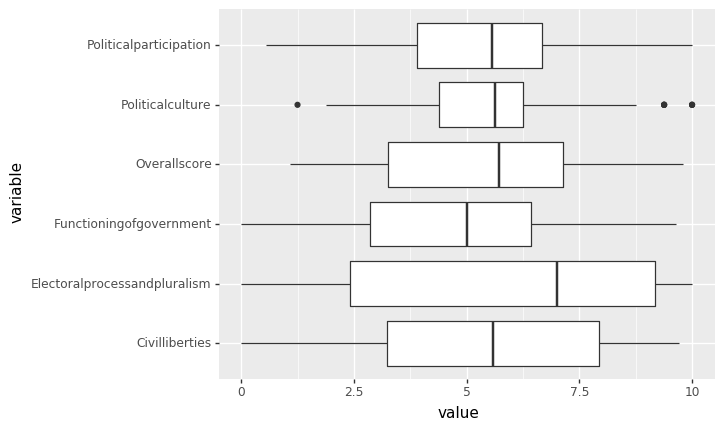

<ggplot: (8762964832657)>

In [43]:
import plotnine as p9


base=p9.ggplot(data=allDataFull_LONG)
base + p9.geom_boxplot(p9.aes(x='variable',y='value')) + p9.coord_flip()

Using the original format (wide), you could only ploy one bar using the previous *grammar*:

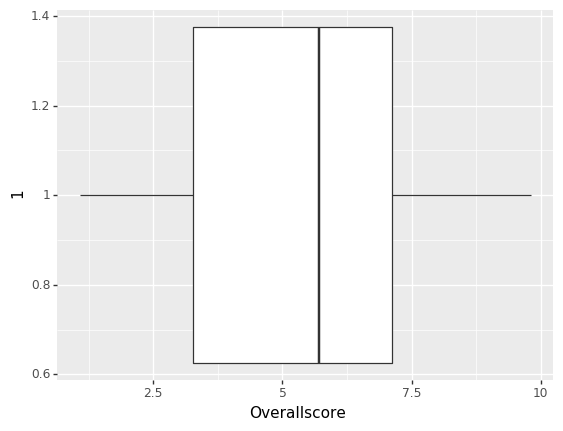

<ggplot: (8762966064509)>

In [44]:
base=p9.ggplot(data=allDataFull)
base + p9.geom_boxplot(p9.aes(x=1,y='Overallscore')) + p9.coord_flip()

Nonetheless, there are packages in Python that use the wide format for plotting (i.e. _seaborn_):

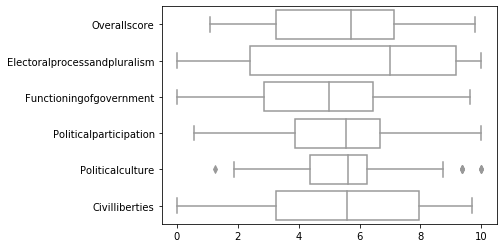

In [45]:
import seaborn as sns
  
whatVars= ['Overallscore', 'Electoralprocessandpluralism',
           'Functioningofgovernment', 'Politicalparticipation', 'Politicalculture',
           'Civilliberties']
sns.boxplot(data=allDataFull[whatVars], 
                 orient="h",color='white')

# Aggregating

Sometimes you need to aggregate your original data frame, that is, aggregate using a particular function some columns by a particular group . 

For example, if we wanted the average of the overall score of democracy by region, and get the result as a data frame:

In [46]:
allDataFull.groupby("Region")[['Overallscore']].agg('mean').reset_index()

Region  Overallscore
0    Africa      4.116400
1  Americas      6.283846
2      Asia      4.412708
3    Europe      7.325897
4   Oceania      7.507500

What if we wanted the average of the overall score of democracy by region and by regime type, and get the result as a data frame:

In [47]:
allDataFull.groupby(["Region","Regimetype"])[['Overallscore']].agg('mean').reset_index()

Region        Regimetype  Overallscore
0     Africa     Authoritarian      2.853214
1     Africa     Hybrid regime      4.968571
2     Africa  Flawed democracy      6.890000
3     Africa    Full democracy      8.140000
4   Americas     Authoritarian      3.066667
5   Americas     Hybrid regime      5.106000
6   Americas  Flawed democracy      6.740000
7   Americas    Full democracy      8.572500
8       Asia     Authoritarian      2.608750
9       Asia     Hybrid regime      5.031000
10      Asia  Flawed democracy      6.710000
11      Asia    Full democracy      8.360000
12    Europe     Authoritarian      2.950000
13    Europe     Hybrid regime      5.618000
14    Europe  Flawed democracy      7.153684
15    Europe    Full democracy      8.907692
16   Oceania     Authoritarian           NaN
17   Oceania     Hybrid regime      5.720000
18   Oceania  Flawed democracy      6.100000
19   Oceania    Full democracy      9.105000

Notice the if you do not use _reset_index()_, you will not get the groups as columns, but as row indexes:

In [48]:
allDataFull.groupby(["Region","Regimetype"])[['Overallscore']].agg('mean')

Overallscore
Region   Regimetype                    
Africa   Authoritarian         2.853214
         Hybrid regime         4.968571
         Flawed democracy      6.890000
         Full democracy        8.140000
Americas Authoritarian         3.066667
         Hybrid regime         5.106000
         Flawed democracy      6.740000
         Full democracy        8.572500
Asia     Authoritarian         2.608750
         Hybrid regime         5.031000
         Flawed democracy      6.710000
         Full democracy        8.360000
Europe   Authoritarian         2.950000
         Hybrid regime         5.618000
         Flawed democracy      7.153684
         Full democracy        8.907692
Oceania  Authoritarian              NaN
         Hybrid regime         5.720000
         Flawed democracy      6.100000
         Full democracy        9.105000

You can also request more aggregative functions:

In [49]:
allDataFull.groupby(["Region","Regimetype"])[['Overallscore']].agg(['min','max']).reset_index()

Region        Regimetype Overallscore      
                                        min   max
0     Africa     Authoritarian         1.13  3.93
1     Africa     Hybrid regime         4.10  5.74
2     Africa  Flawed democracy         6.30  7.65
3     Africa    Full democracy         8.14  8.14
4   Americas     Authoritarian         2.76  3.60
5   Americas     Hybrid regime         4.22  5.90
6   Americas  Flawed democracy         6.01  7.92
7   Americas    Full democracy         8.16  9.24
8       Asia     Authoritarian         1.08  3.83
9       Asia     Hybrid regime         4.16  5.99
10      Asia  Flawed democracy         6.03  7.84
11      Asia    Full democracy         8.01  8.94
12    Europe     Authoritarian         2.59  3.31
13    Europe     Hybrid regime         4.84  5.89
14    Europe  Flawed democracy         6.08  7.99
15    Europe    Full democracy         8.12  9.81
16   Oceania     Authoritarian          NaN   NaN
17   Oceania     Hybrid regime         5.72  5.72
18   Oceania  Flawed democracy         6.10  6.10
19   Oceania    Full democracy         8.96  9.25

And of course, more variables to aggregate:

In [50]:
severalVars=['Electoralprocessandpluralism','Functioningofgovernment', 'Politicalparticipation']
allDataFull.groupby(["Region","Regimetype"])[severalVars].agg(['min','max']).reset_index()

Region        Regimetype Electoralprocessandpluralism         \
                                                        min    max   
0     Africa     Authoritarian                         0.00   5.17   
1     Africa     Hybrid regime                         3.33   7.92   
2     Africa  Flawed democracy                         7.00   9.17   
3     Africa    Full democracy                         9.17   9.17   
4   Americas     Authoritarian                         0.00   0.42   
5   Americas     Hybrid regime                         4.75   9.17   
6   Americas  Flawed democracy                         6.50   9.58   
7   Americas    Full democracy                         9.58  10.00   
8       Asia     Authoritarian                         0.00   5.25   
9       Asia     Hybrid regime                         3.17   8.75   
10      Asia  Flawed democracy                         4.83   9.58   
11      Asia    Full democracy                         8.75  10.00   
12    Europe     Authoritarian                         0.00   2.17   
13    Europe     Hybrid regime                         7.00   8.25   
14    Europe  Flawed democracy                         7.00   9.58   
15    Europe    Full democracy                         9.58  10.00   
16   Oceania     Authoritarian                          NaN    NaN   
17   Oceania     Hybrid regime                         6.58   6.58   
18   Oceania  Flawed democracy                         6.92   6.92   
19   Oceania    Full democracy                        10.00  10.00   

   Functioningofgovernment       Politicalparticipation         
                       min   max                    min    max  
0                     0.00  4.29                   0.56   5.56  
1                     2.71  5.71                   3.33   6.67  
2                     4.14  7.14                   6.11   8.33  
3                     7.86  7.86                   6.11   6.11  
4                     1.79  3.57                   3.33   5.00  
5                     1.71  4.29                   2.78   6.11  
6                     4.29  7.14                   5.00   8.89  
7                     6.79  8.93                   6.67   8.89  
8                     0.00  4.29                   1.67   7.78  
9                     1.50  6.79                   3.33   6.67  
10                    5.00  7.86                   4.44   9.44  
11                    8.21  9.64                   6.67   7.22  
12                    2.00  2.14                   3.89   5.00  
13                    2.71  5.71                   5.56   7.22  
14                    5.21  7.86                   4.44   7.78  
15                    7.14  9.64                   6.67  10.00  
16                     NaN   NaN                    NaN    NaN  
17                    5.00  5.00                   6.11   6.11  
18                    6.07  6.07                   3.33   3.33  
19                    8.57  8.93                   7.78   8.89

The previous column names look more complex:

In [51]:
multi=allDataFull.groupby(["Region","Regimetype"])[severalVars].agg(['min','max']).reset_index()
multi.columns

MultiIndex([(                      'Region',    ''),
            (                  'Regimetype',    ''),
            ('Electoralprocessandpluralism', 'min'),
            ('Electoralprocessandpluralism', 'max'),
            (     'Functioningofgovernment', 'min'),
            (     'Functioningofgovernment', 'max'),
            (      'Politicalparticipation', 'min'),
            (      'Politicalparticipation', 'max')],
           )

The aggregation process can produce **multiIndex**. Most of the time you want to flatten the multiIndex. We could use some basic string operations for that:

In [52]:
# concatenating:
[(col[0]+'_'+col[1]) for col in multi.columns ]

['Region_',
 'Regimetype_',
 'Electoralprocessandpluralism_min',
 'Electoralprocessandpluralism_max',
 'Functioningofgovernment_min',
 'Functioningofgovernment_max',
 'Politicalparticipation_min',
 'Politicalparticipation_max']

In [53]:
# concatenating if secind element is not '':
[(col[0]+'_'+col[1]) if col[1]!='' else col[0] for col in multi.columns ]

['Region',
 'Regimetype',
 'Electoralprocessandpluralism_min',
 'Electoralprocessandpluralism_max',
 'Functioningofgovernment_min',
 'Functioningofgovernment_max',
 'Politicalparticipation_min',
 'Politicalparticipation_max']

In [54]:
# same as before, but using 'join' function: 
['_'.join(col).strip() if col[1]!='' else col[0] for col in multi.columns ]

['Region',
 'Regimetype',
 'Electoralprocessandpluralism_min',
 'Electoralprocessandpluralism_max',
 'Functioningofgovernment_min',
 'Functioningofgovernment_max',
 'Politicalparticipation_min',
 'Politicalparticipation_max']

I will save the new column names:

In [55]:
multi.columns= ['_'.join(col).strip() if col[1]!='' else col[0] for col in multi.columns ]

This is the current look:

In [56]:
multi

Region        Regimetype  Electoralprocessandpluralism_min  \
0     Africa     Authoritarian                              0.00   
1     Africa     Hybrid regime                              3.33   
2     Africa  Flawed democracy                              7.00   
3     Africa    Full democracy                              9.17   
4   Americas     Authoritarian                              0.00   
5   Americas     Hybrid regime                              4.75   
6   Americas  Flawed democracy                              6.50   
7   Americas    Full democracy                              9.58   
8       Asia     Authoritarian                              0.00   
9       Asia     Hybrid regime                              3.17   
10      Asia  Flawed democracy                              4.83   
11      Asia    Full democracy                              8.75   
12    Europe     Authoritarian                              0.00   
13    Europe     Hybrid regime                              7.00   
14    Europe  Flawed democracy                              7.00   
15    Europe    Full democracy                              9.58   
16   Oceania     Authoritarian                               NaN   
17   Oceania     Hybrid regime                              6.58   
18   Oceania  Flawed democracy                              6.92   
19   Oceania    Full democracy                             10.00   

    Electoralprocessandpluralism_max  Functioningofgovernment_min  \
0                               5.17                         0.00   
1                               7.92                         2.71   
2                               9.17                         4.14   
3                               9.17                         7.86   
4                               0.42                         1.79   
5                               9.17                         1.71   
6                               9.58                         4.29   
7                              10.00                         6.79   
8                               5.25                         0.00   
9                               8.75                         1.50   
10                              9.58                         5.00   
11                             10.00                         8.21   
12                              2.17                         2.00   
13                              8.25                         2.71   
14                              9.58                         5.21   
15                             10.00                         7.14   
16                               NaN                          NaN   
17                              6.58                         5.00   
18                              6.92                         6.07   
19                             10.00                         8.57   

    Functioningofgovernment_max  Politicalparticipation_min  \
0                          4.29                        0.56   
1                          5.71                        3.33   
2                          7.14                        6.11   
3                          7.86                        6.11   
4                          3.57                        3.33   
5                          4.29                        2.78   
6                          7.14                        5.00   
7                          8.93                        6.67   
8                          4.29                        1.67   
9                          6.79                        3.33   
10                         7.86                        4.44   
11                         9.64                        6.67   
12                         2.14                        3.89   
13                         5.71                        5.56   
14                         7.86                        4.44   
15                         9.64                        6.67   
16                          NaN                         

The current result can also be used when melting to a long format:

In [57]:
multi.melt(id_vars=['Region','Regimetype'])

Region        Regimetype                          variable  value
0      Africa     Authoritarian  Electoralprocessandpluralism_min   0.00
1      Africa     Hybrid regime  Electoralprocessandpluralism_min   3.33
2      Africa  Flawed democracy  Electoralprocessandpluralism_min   7.00
3      Africa    Full democracy  Electoralprocessandpluralism_min   9.17
4    Americas     Authoritarian  Electoralprocessandpluralism_min   0.00
..        ...               ...                               ...    ...
115    Europe    Full democracy        Politicalparticipation_max  10.00
116   Oceania     Authoritarian        Politicalparticipation_max    NaN
117   Oceania     Hybrid regime        Politicalparticipation_max   6.11
118   Oceania  Flawed democracy        Politicalparticipation_max   3.33
119   Oceania    Full democracy        Politicalparticipation_max   8.89

[120 rows x 4 columns]

____


# <font color="red">SAVING FILE</font>

The current _allDataFull_ data frame is clean and formatted. We have used CSV files so far:

In [59]:
allDataFull.to_csv("allDataFull_OK.csv",index=False)

When we read back the file you may notice something wrong:

In [61]:
allDataFull_OK=pd.read_csv("allDataFull_OK.csv")
allDataFull_OK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       167 non-null    object 
 1   Regimetype                    167 non-null    object 
 2   Overallscore                  167 non-null    float64
 3   Electoralprocessandpluralism  167 non-null    float64
 4   Functioningofgovernment       167 non-null    float64
 5   Politicalparticipation        167 non-null    float64
 6   Politicalculture              167 non-null    float64
 7   Civilliberties                167 non-null    float64
 8   InternetccTLD                 167 non-null    object 
 9   iso2                          166 non-null    object 
 10  iso3                          167 non-null    object 
 11  Region                        167 non-null    object 
dtypes: float64(6), object(6)
memory usage: 15.8+ KB


We need a file that avoids we have to reformat the columns again and again. Let's see the choices:

#### For future use in Python:

In [62]:
allDataFull.to_pickle("allDataFull_OK.pkl")
# you will need: DF=pd.read_pickle("allDataFull.pkl")
# or:
# from urllib.request import urlopen
# DF=pd.read_pickle(urlopen("https://..../allDataFull.pkl"),compression=None)

In [63]:
allDataFull_OK=pd.read_pickle("allDataFull_OK.pkl")
allDataFull_OK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Country                       167 non-null    object  
 1   Regimetype                    167 non-null    category
 2   Overallscore                  167 non-null    float64 
 3   Electoralprocessandpluralism  167 non-null    float64 
 4   Functioningofgovernment       167 non-null    float64 
 5   Politicalparticipation        167 non-null    float64 
 6   Politicalculture              167 non-null    float64 
 7   Civilliberties                167 non-null    float64 
 8   InternetccTLD                 167 non-null    object  
 9   iso2                          166 non-null    object  
 10  iso3                          167 non-null    object  
 11  Region                        167 non-null    object  
dtypes: category(1), float64(6), object(5)
memory usage

In [64]:
allDataFull_OK.Regimetype

0      Full democracy
1      Full democracy
2      Full democracy
3      Full democracy
4      Full democracy
            ...      
162     Authoritarian
163     Authoritarian
164     Authoritarian
165     Authoritarian
166     Authoritarian
Name: Regimetype, Length: 167, dtype: category
Categories (4, object): ['Authoritarian' < 'Hybrid regime' < 'Flawed democracy' < 'Full democracy']

#### For future  use in R:

In [60]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

from rpy2.robjects.packages import importr

base = importr('base')
base.saveRDS(allDataFull,file="allDataFull_OK.RDS")

#In R, you call it with: DF = readRDS("allDataFull.RDS")
#or, if iyou read from cloud: DF = readRDS(url("https://..../allDataFull.RDS")

/Users/JoseManuel/anaconda3/envs/Evans_GovAnalytics/lib/python3.7/site-packages/rpy2/robjects/vectors.py:980: UserWarning: R object inheriting from "POSIXct" but without attribute "tzone".


<rpy2.rinterface_lib.sexp.NULLType object at 0x7f84981d5dc0> [RTYPES.NILSXP]